# Visualisations 

In [233]:
import math
from typing import List

import scipy
import scipy.sparse
from sklearn.neighbors import NearestNeighbors
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

# plt.style.use('seaborn-v0_8-paper')
plt.style.use('ggplot')

# plt.style.available

# Kernel Visualisation

In [234]:
# KERNELS
def rbf(distance, variance):
    return math.exp(- (distance**2) / (2 * variance))

def laplacian(distance,variance):
    return math.exp(- (distance) / (math.sqrt(variance)))



def sigmoid_kernel(x, y, gamma: float = 1.0, coef0: float = 0.0) -> float:
    # Needs γ and c inside 'nice' ranges to stay in the valid kernel regime.
    x, y = np.asarray(x), np.asarray(y)
    return math.tanh(gamma * float(np.dot(x, y)) + coef0)

def chi2(distance, gamma):
    # Implemented using distance instead of vectors
    return math.exp(-gamma * distance)


# need to access the actual neighbours for these below

# Cosine 
# Polynomial

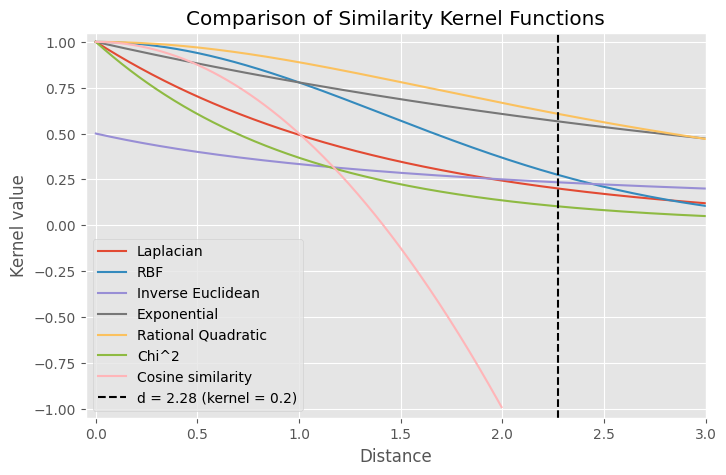

In [235]:
# Distances
d = np.linspace(0.0, 3.0, 500)
# Variance
variance = 2.0          
# alpha     = 1.0           # Rational Quadratic shape
# length_sq = 1.0           # Rational Quadratic ℓ²
# gamma     = 1.0           # chi sq
alpha = 1.0

# Radial kernels
rbf = np.exp(- (d**2) / (2 * variance))
laplacian_vals = np.exp(-d / math.sqrt(variance))
exponential_vals = np.exp(-d / (2 * variance))
inverse_euclidean = 1 / (2+d)

rational_quadratic = 1 / (1 + (d**2 / (2 * alpha * variance**2)))
# rq_vals        = (1 + d**2 / 2.0)**-1       # alpha = 1, ℓ = 1
chi2_vals      = np.exp(-d)                 # γ = 1, using χ² distance = d

# Map Euclidean distance → dot product for unit-norm vectors
dot = 1 - d**2 / 2.0                        # ⟨x,y⟩ = cos θ
# sigmoid_vals = np.tanh(dot)                 # γ = 1, c = 0
# cosine_vals  = dot                          # cosine similarity itself

valid = dot >= -1.0                                # keep sigmoid/cosine valid
# sigmoid_vals = np.where(valid, np.tanh(dot), np.nan)
cosine_vals  = np.where(valid, dot,       np.nan)



# Plot everything together
plt.figure(figsize=(8, 5))
plt.plot(d, laplacian_vals, label='Laplacian')
plt.plot(d, rbf, label='RBF')
plt.plot(d, inverse_euclidean, label='Inverse Euclidean')
plt.plot(d, exponential_vals, label ='Exponential' )
plt.plot(d, rational_quadratic, label='Rational Quadratic')
plt.plot(d, chi2_vals, label='Chi^2')
# plt.plot(d, sigmoid_vals, label='Sigmoid (tanh)')
plt.plot(d, cosine_vals, label='Cosine similarity')

# Plot line where laplacian reaches 0.1 since it is the fastest decaying kernel (most of the times)
threshold_val = 0.20
target_d = -math.log(threshold_val) * math.sqrt(variance)


plt.axvline(target_d, linestyle='--', color='k',
            label=f'd = {target_d:.2f} (kernel = {threshold_val})')

plt.xlabel('Distance')
plt.ylabel('Kernel value')
plt.title('Comparison of Similarity Kernel Functions')
plt.ylim(-1.05, 1.05)
plt.xlim(-0.05, 3.0)
plt.legend()
plt.grid(True)
plt.show()

# Experiment Visualisations

In [236]:
# Get paths to all the experiment csvs
csv_directory = "results/bsds/csv_results/"
paths = [f for f in os.listdir(csv_directory) if f.endswith('.csv') and f != "experimentStats.csv"]
paths.sort()
print(paths)
# paths for FCN
fcn_paths = [f for f in paths if f.startswith("01")]
fcn_paths.sort()
print(fcn_paths)
# Paths for laplacian
lpl_paths = [f for f in paths if f.startswith("02")]
lpl_paths.sort()
print(lpl_paths)
# Paths for inverse euclidean
inv_paths = [f for f in paths if f.startswith("03")]
inv_paths.sort()
print(inv_paths)
# paths for KNN
knn_paths = [str(f) for f in paths if f.startswith("KNN")]
knn_paths.sort()
print(knn_paths)

['01_0_FCN_rbf.csv', '01_1_FCN_rbf.csv', '01_2_FCN_rbf.csv', '01_3_FCN_rbf.csv', '01_4_FCN_rbf.csv', '01_5_FCN_rbf.csv', '02_0_FCN_laplacian.csv', '02_1_FCN_laplacian.csv', '02_2_FCN_laplacian.csv', '02_3_FCN_laplacian.csv', '02_4_FCN_laplacian.csv', '03_0_FCN_inverse_euclid.csv', '03_1_FCN_inverse_euclid.csv', '03_2_FCN_inverse_euclid.csv', '03_3_FCN_inverse_euclid.csv', '03_4_FCN_inverse_euclid.csv', '03_5_FCN_inverse_euclid.csv', '03_6_FCN_inverse_euclid.csv', '03_7_FCN_inverse_euclid.csv', '03_8_FCN_inverse_euclid.csv', 'KNN_01.csv', 'KNN_02.csv', 'KNN_03.csv', 'KNN_04.csv', 'KNN_05.csv', 'KNN_06.csv', 'KNN_07.csv']
['01_0_FCN_rbf.csv', '01_1_FCN_rbf.csv', '01_2_FCN_rbf.csv', '01_3_FCN_rbf.csv', '01_4_FCN_rbf.csv', '01_5_FCN_rbf.csv']
['02_0_FCN_laplacian.csv', '02_1_FCN_laplacian.csv', '02_2_FCN_laplacian.csv', '02_3_FCN_laplacian.csv', '02_4_FCN_laplacian.csv']
['03_0_FCN_inverse_euclid.csv', '03_1_FCN_inverse_euclid.csv', '03_2_FCN_inverse_euclid.csv', '03_3_FCN_inverse_euclid.c

### RBF Kernel with different variances

In [237]:
# Read csvs of experiments with rbf kernel into pd dataframe
fcn_rbf_10 = pd.read_csv("results/bsds/csv_results/01_0_FCN_rbf.csv")
fcn_rbf_20 = pd.read_csv("results/bsds/csv_results/01_1_FCN_rbf.csv")
fcn_rbf_50 = pd.read_csv("results/bsds/csv_results/01_2_FCN_rbf.csv")
fcn_rbf_100 = pd.read_csv("results/bsds/csv_results/01_3_FCN_rbf.csv")
fcn_rbf_200 = pd.read_csv("results/bsds/csv_results/01_4_FCN_rbf.csv")


variance_mapping = [10, 20, 50, 100, 200, 5]


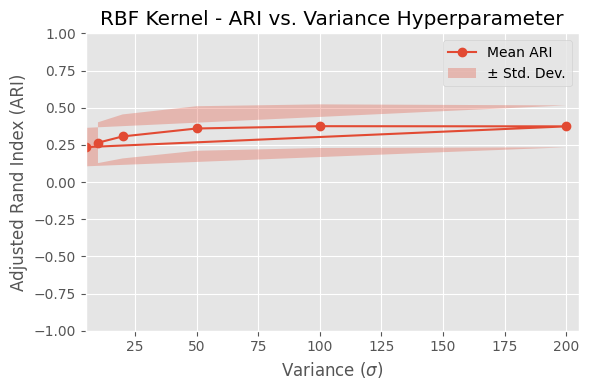

In [238]:
# Plot average ri per variance value


# average = {
#     '10':  fcn_rbf_10['ri'].mean(),
#     '20':  fcn_rbf_20['ri'].mean(),
#     '50':  fcn_rbf_50['ri'].mean(),
#     '100': fcn_rbf_100['ri'].mean(),
#     '200': fcn_rbf_100['ri'].mean(),
# }

sigmas = []
means = []
stdevs = []

for fileName in fcn_paths: 
    index = int(fileName.split("_")[1])
    sigma = variance_mapping[index]

    df = pd.read_csv(csv_directory + fileName)
    sigmas.append(sigma)
    means.append(df['ri'].mean())
    stdevs.append(df['ri'].std())


# Sort by sigma
# sigmas, means, stdevs = zip(sigmas, means, stdevs)

# --- STEP 3: plot ---
plt.figure(figsize=(6,4))
plt.plot(sigmas, means, marker='o', label='Mean ARI')
plt.fill_between(
    sigmas,
    [m-s for m, s in zip(means, stdevs)],
    [m+s for m, s in zip(means, stdevs)],
    alpha=0.3,
    label='± Std. Dev.'
)
plt.xlabel('Variance ($\sigma$)')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.ylim(-1,1)
plt.xlim(5,205)
plt.title('RBF Kernel - ARI vs. Variance Hyperparameter')
plt.legend()
plt.tight_layout()
plt.show()


### Laplacian with different variances

0
1
2
3
4


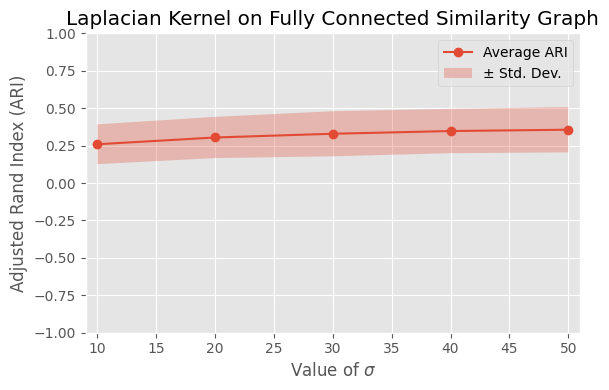

In [239]:
k_values = []
means = []
stdevs = []

triples = []

lpl_mapping = [20,50,10,30,40]

for fileName in lpl_paths: 
    index = int(fileName.split("_")[1])
    print(index)
    k = lpl_mapping[index]

    df = pd.read_csv(csv_directory + fileName)
    k_values.append(k)
    means.append(df['ri'].mean())
    stdevs.append(df['ri'].std())
    mean_ri = df['ri'].mean()
    std_ri  = df['ri'].std()
    triples.append((k, mean_ri, std_ri))


# Sort by k
triples_sorted = sorted(triples, key=lambda t: t[0])
ks, means, stdevs = zip(*triples_sorted)

#plot
plt.figure(figsize=(6,4))
plt.plot(ks, means, marker='o', label='Average ARI')
plt.fill_between(
    ks,
    [m-s for m, s in zip(means, stdevs)],
    [m+s for m, s in zip(means, stdevs)],
    alpha=0.3,
    label='± Std. Dev.'
)
plt.xlabel('Value of $\sigma$')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.ylim(-1,1)
plt.xlim(min(lpl_mapping)-1,max(lpl_mapping)+1)
plt.title('Laplacian Kernel on Fully Connected Similarity Graph')
plt.legend()
plt.tight_layout()
plt.show()


### Inverse Euclidean with different powers

0
1
2
3
4


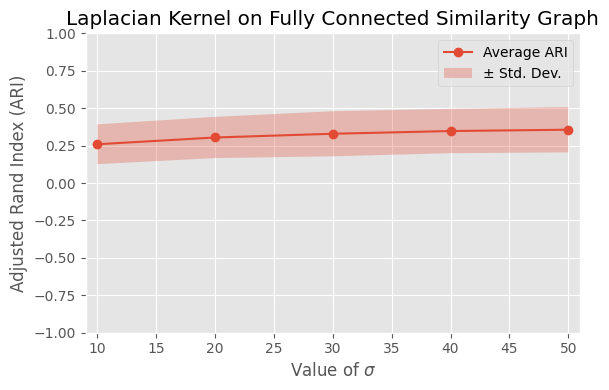

In [240]:
k_values = []
means = []
stdevs = []

triples = []

inv_mapping = [1,3,5,7,10]

for fileName in lpl_paths: 
    index = int(fileName.split("_")[1])
    print(index)
    k = lpl_mapping[index]

    df = pd.read_csv(csv_directory + fileName)
    k_values.append(k)
    means.append(df['ri'].mean())
    stdevs.append(df['ri'].std())
    mean_ri = df['ri'].mean()
    std_ri  = df['ri'].std()
    triples.append((k, mean_ri, std_ri))


# Sort by k
triples_sorted = sorted(triples, key=lambda t: t[0])
ks, means, stdevs = zip(*triples_sorted)

#plot
plt.figure(figsize=(6,4))
plt.plot(ks, means, marker='o', label='Average ARI')
plt.fill_between(
    ks,
    [m-s for m, s in zip(means, stdevs)],
    [m+s for m, s in zip(means, stdevs)],
    alpha=0.3,
    label='± Std. Dev.'
)
plt.xlabel('Value of $\sigma$')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.ylim(-1,1)
plt.xlim(min(lpl_mapping)-1,max(lpl_mapping)+1)
plt.title('Laplacian Kernel on Fully Connected Similarity Graph')
plt.legend()
plt.tight_layout()
plt.show()


## KNN with diff k

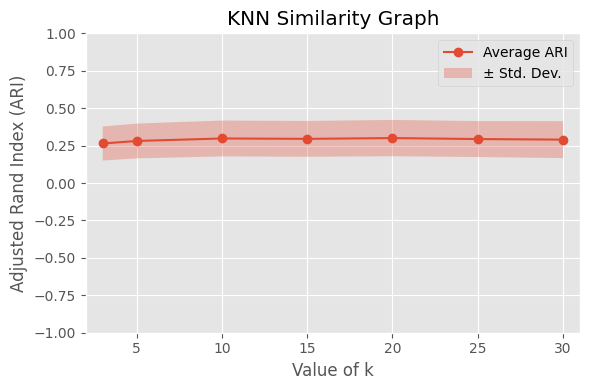

In [241]:
k_values = []
means = []
stdevs = []

triples = []

knn_mapping = [0, 5, 10 ,20 ,30, 3, 15, 25]
# knn_mapping = [0, 5, 10 ,20 ,30, 3]

for fileName in knn_paths: 
    index = int(fileName.split("_")[1][1])
    k = knn_mapping[index]

    df = pd.read_csv(csv_directory + fileName)
    k_values.append(k)
    means.append(df['ri'].mean())
    stdevs.append(df['ri'].std())
    mean_ri = df['ri'].mean()
    std_ri  = df['ri'].std()
    triples.append((k, mean_ri, std_ri))


# Sort by k_values
# sigmas, means, stdevs = zip(sigmas, means, stdevs)
    

# Sort by k
triples_sorted = sorted(triples, key=lambda t: t[0])
ks, means, stdevs = zip(*triples_sorted)

# plot
plt.figure(figsize=(6,4))
plt.plot(ks, means, marker='o', label='Average ARI')
plt.fill_between(
    ks,
    [m-s for m, s in zip(means, stdevs)],
    [m+s for m, s in zip(means, stdevs)],
    alpha=0.3,
    label='± Std. Dev.'
)
plt.xlabel('Value of k')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.ylim(-1,1)
plt.xlim(2,max(knn_mapping)+1)
plt.title('KNN Similarity Graph')
plt.legend()
plt.tight_layout()
plt.show()


### Metric vs # Clusters for each experiment

#### ARI vs # Clusters

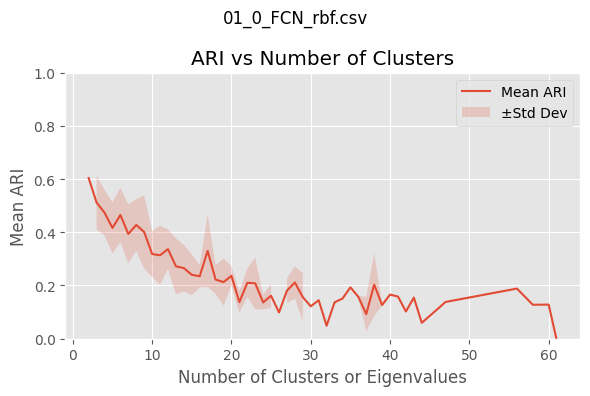

In [242]:
# paths = ["results/bsds/csv_results/01_0_FCN_rbf.csv"]

for path in paths: 
    data = pd.read_csv(csv_directory + path)
    stats = data.groupby('eigs')['ri'].agg(['mean', 'std']).reset_index()

    x = stats['eigs']
    y = stats['mean']
    yerr = stats['std']

    plt.figure(figsize=(6,4))
    plt.suptitle(path)
    plt.plot(x, y, label='Mean ARI')
    plt.fill_between(x, y - yerr, y + yerr, alpha=0.2, label='±Std Dev')
    plt.xlabel('Number of Clusters or Eigenvalues')
    plt.ylabel('Mean ARI')
    plt.title('ARI vs Number of Clusters')
    plt.legend()
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()
    break

#### ARI vs # Clusters for all tests (overlaid)

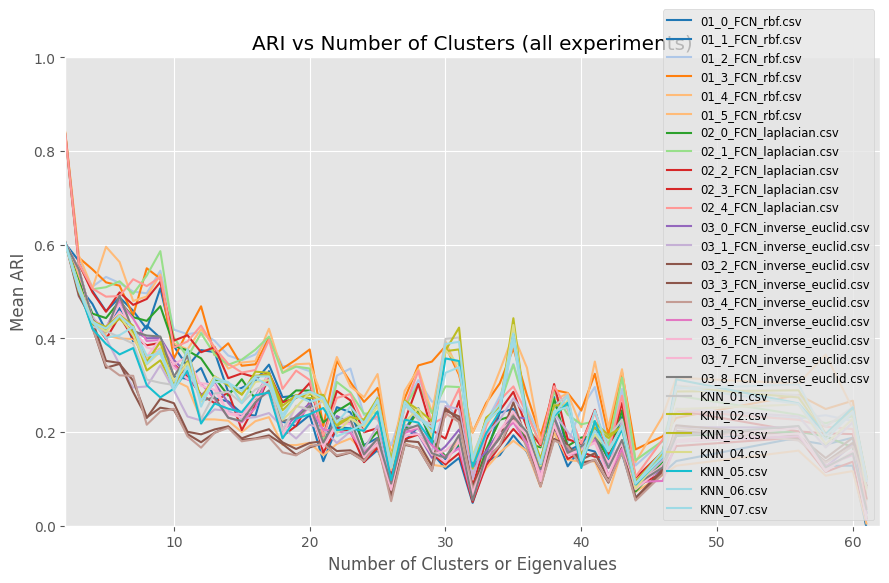

In [243]:
plt.figure(figsize=(9,6))

cmap = plt.get_cmap('tab20', len(paths)) 

for i, fileName in enumerate(paths): 
    data = pd.read_csv(csv_directory + fileName)
    stats = data.groupby('eigs')['ri'].agg(['mean', 'std']).reset_index()

    x = stats['eigs']
    y = stats['mean']
    yerr = stats['std']

    # plt.plot(x, y, marker='o', label=fileName)
    plt.plot(x, y, label=fileName, color = cmap(i))
    # plt.fill_between(x,
    #                  y - yerr,
    #                  y + yerr,
    #                  alpha=0.2)


# plt.suptitle(fileName)
# plt.plot(x, y, label='Mean ARI')
# plt.fill_between(x, y - yerr, y + yerr, alpha=0.2, label='±Std Dev')
plt.xlabel('Number of Clusters or Eigenvalues')
plt.ylabel('Mean ARI')
plt.title('ARI vs Number of Clusters (all experiments)')
plt.legend(fontsize = 'small')
plt.ylim(0,1)
plt.xlim(2,62)
plt.tight_layout()
plt.show()

#### VOI vs # Clusters

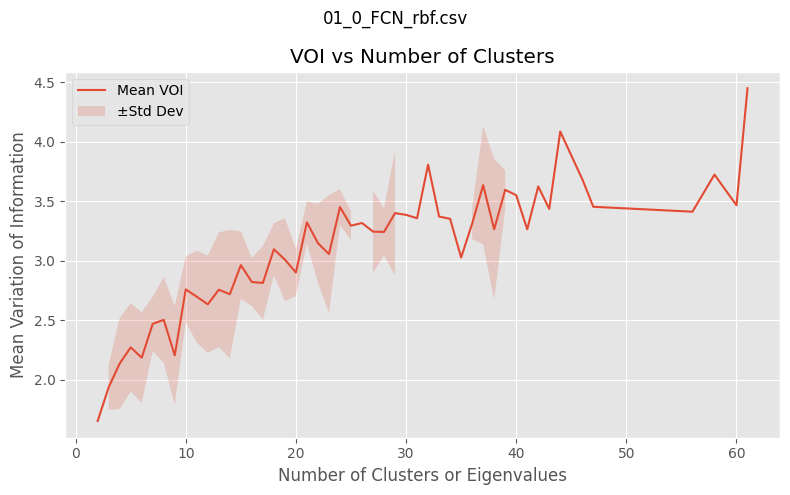

In [244]:


for path in paths: 
    data = pd.read_csv(csv_directory + path)
    stats = data.groupby('eigs')['voi'].agg(['mean', 'std']).reset_index()

    x = stats['eigs']
    y = stats['mean']
    yerr = stats['std']

    plt.figure(figsize=(8,5))
    plt.suptitle(path)
    plt.plot(x, y, label='Mean VOI')
    plt.fill_between(x, y - yerr, y + yerr, alpha=0.2, label='±Std Dev')
    plt.xlabel('Number of Clusters or Eigenvalues')
    plt.ylabel('Mean Variation of Information')
    plt.title('VOI vs Number of Clusters')
    plt.legend()
    plt.tight_layout()
    plt.show()
    break # TODO remove if want to see all

### Kernel Metrics Comparison Table

In [260]:
comparison = pd.DataFrame(columns=['ExperimentName', 'ARI avg', 'ARI stdev', 'Max ARI', 'Min ARI' , 'VOI avg', 'VOI stdev', 'Runtime Mean', 
                                   'Runtime Stdev','Total Runtime', 'Graph Size Mean', 'Graph Size Stdev'])
rows = []
for fileName in paths: 
    df = pd.read_csv(csv_directory + fileName)
    rows.append({
        'ExperimentName': fileName,
        'ARI avg':   df['ri'].mean(),
        'ARI stdev': df['ri'].std(),
        'Max ARI': df['ri'].max(),
        'Min ARI': df['ri'].min(),
        'VOI avg':   df['voi'].mean(),
        'VOI stdev': df['voi'].std(), 
        'Runtime Mean': df['duration'].mean(),
        'Runtime Stdev': df['duration'].std(),
        'Total Runtime': df['duration'].sum() / 60,
        'Graph Size Mean': df['graphSize'].mean(),
        'Graph Size Stdev': df['graphSize'].std()
    })

comparison = pd.DataFrame(rows,
                          columns=['ExperimentName', 'ARI avg', 'ARI stdev', 'Max ARI', 'Min ARI' , 'VOI avg', 'VOI stdev', 'Runtime Mean', 
                                   'Runtime Stdev', 'Total Runtime', 'Graph Size Mean', 'Graph Size Stdev'])
print(comparison)

                 ExperimentName   ARI avg  ARI stdev   Max ARI   Min ARI  \
0              01_0_FCN_rbf.csv  0.264412   0.137208  0.619557 -0.003299   
1              01_1_FCN_rbf.csv  0.306678   0.148023  0.700937  0.027941   
2              01_2_FCN_rbf.csv  0.359990   0.149824  0.836795  0.054139   
3              01_3_FCN_rbf.csv  0.375522   0.146795  0.838881  0.056679   
4              01_4_FCN_rbf.csv  0.374392   0.140856  0.839917  0.062613   
5              01_5_FCN_rbf.csv  0.234847   0.129369  0.610101  0.004674   
6        02_0_FCN_laplacian.csv  0.304217   0.137520  0.672172  0.017472   
7        02_1_FCN_laplacian.csv  0.356192   0.151474  0.866789  0.035208   
8        02_2_FCN_laplacian.csv  0.259064   0.132887  0.620319  0.016211   
9        02_3_FCN_laplacian.csv  0.329170   0.150560  0.861640  0.046969   
10       02_4_FCN_laplacian.csv  0.347294   0.147986  0.836452  0.040039   
11  03_0_FCN_inverse_euclid.csv  0.274507   0.134633  0.623260  0.014119   
12  03_1_FCN

In [261]:
comparison.style \
    .format({
        'ARI avg':   '{:.2f}',
        'ARI stdev': '{:.2f}',
        'Max ARI':   '{:.2f}',
        'Min ARI':   '{:.2f}',
        'VOI avg':   '{:.2f}',
        'VOI stdev': '{:.2f}',
        'Runtime Mean':'{:.2f}',
        'Runtime Stdev': '{:.2f}',
        'Total Runtime': '{:.2f}',
        'Graph Size Mean': '{:.2f}',
        'Graph Size Stdev': '{:.2f}'
    }) \
    .highlight_max(subset=['ARI avg'], color='green') \
    .set_caption("Experiment Comparison Results")



,ExperimentName,ARI avg,ARI stdev,Max ARI,Min ARI,VOI avg,VOI stdev,Runtime Mean,Runtime Stdev,Total Runtime,Graph Size Mean,Graph Size Stdev
0,01_0_FCN_rbf.csv,0.26,0.14,0.62,-0.00,2.91,0.55,14.00,5.94,46.65,156419.20,92812.95
1,01_1_FCN_rbf.csv,0.31,0.15,0.70,0.03,2.72,0.56,19.66,9.25,65.53,357692.78,195682.68
2,01_2_FCN_rbf.csv,0.36,0.15,0.84,0.05,2.55,0.57,38.41,15.27,128.04,1048112.34,490691.48
3,01_3_FCN_rbf.csv,0.38,0.15,0.84,0.06,2.56,0.57,69.87,23.57,232.89,2328576.38,947516.67
4,01_4_FCN_rbf.csv,0.37,0.14,0.84,0.06,2.61,0.57,136.62,40.89,455.40,5098634.29,1783644.94
5,01_5_FCN_rbf.csv,0.23,0.13,0.61,0.00,3.08,0.55,12.31,4.53,41.03,68484.81,41837.35
6,02_0_FCN_laplacian.csv,0.30,0.14,0.67,0.02,2.73,0.53,18.06,8.21,60.18,254923.95,136289.67
7,02_1_FCN_laplacian.csv,0.36,0.15,0.87,0.04,2.58,0.58,35.50,13.85,118.32,741215.54,340555.27
8,02_2_FCN_laplacian.csv,0.26,0.13,0.62,0.02,2.90,0.55,12.84,5.03,42.81,113050.30,64876.50
9,02_3_FCN_laplacian.csv,0.33,0.15,0.86,0.05,2.63,0.57,24.24,10.99,80.81,409486.28,205847.38


## Correlation Heatmap

In [264]:
# Pearson Correlation table
variables = comparison[['ARI avg', 'VOI avg' , 'Runtime Mean', 'Graph Size Mean']]
correlation = variables.corr(method='pearson')
round(correlation, 2)

,ARI avg,VOI avg,Runtime Mean,Graph Size Mean
ARI avg,1.00,-0.95,0.57,0.65
VOI avg,-0.95,1.00,-0.35,-0.47
Runtime Mean,0.57,-0.35,1.00,0.95
Graph Size Mean,0.65,-0.47,0.95,1.00


<Axes: title={'center': 'Correlation Matrix'}>

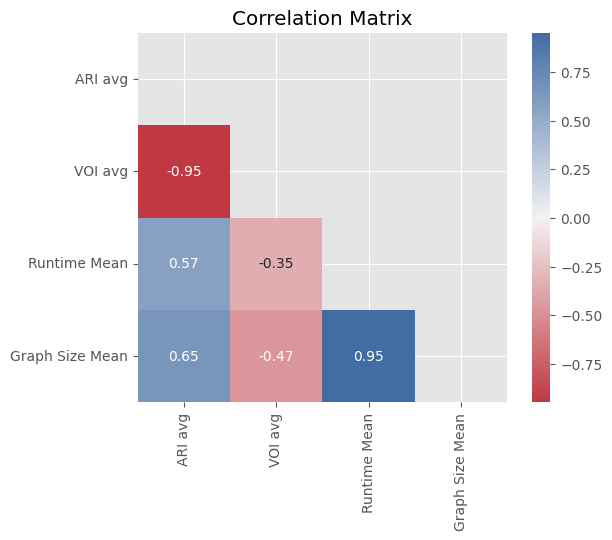

In [296]:
# Plot correlation matrix
mask = np.triu(np.ones_like(correlation, dtype=bool))
cmap = sns.diverging_palette(h_pos=250, h_neg=10, s=70, l=45, center='light', n=256)
plt.title("Correlation Matrix")
sns.heatmap(correlation, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)